In [ ]:
!pip install pyspark

In [46]:
from pyspark.sql import SparkSession

spark  = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
print(sc)

<SparkContext master=local[*] appName=pyspark-shell>


In [72]:
df = spark.read.csv('../data/fruit_prices.csv', header=True, inferSchema=True)
df.show(5)

+--------------------+------+-----------+---------------+-----+-----------------+-----------------+------------------+
|               Fruit|  Form|RetailPrice|RetailPriceUnit|Yield|CupEquivalentSize|CupEquivalentUnit|CupEquivalentPrice|
+--------------------+------+-----------+---------------+-----+-----------------+-----------------+------------------+
|              Apples| Fresh|     1.5193|      per pound|  0.9|           0.2425|           pounds|            0.4094|
|  Apples, applesauce|Canned|      1.066|      per pound|  1.0|           0.5401|           pounds|            0.5758|
|Apples, ready-to-...| Juice|     0.7804|       per pint|  1.0|              8.0|     fluid ounces|            0.3902|
|Apples, frozen co...| Juice|     0.5853|       per pint|  1.0|              8.0|     fluid ounces|            0.2926|
|            Apricots| Fresh|     2.9665|      per pound| 0.93|           0.3638|           pounds|            1.1603|
+--------------------+------+-----------+-------

In [73]:
df.select('Fruit').show(3)

+--------------------+
|               Fruit|
+--------------------+
|              Apples|
|  Apples, applesauce|
|Apples, ready-to-...|
+--------------------+
only showing top 3 rows



In [29]:
df.filter(df.RetailPrice < 1).show(3)

+--------------------+-----+-----------+---------------+-----+-----------------+-----------------+------------------+
|               Fruit| Form|RetailPrice|RetailPriceUnit|Yield|CupEquivalentSize|CupEquivalentUnit|CupEquivalentPrice|
+--------------------+-----+-----------+---------------+-----+-----------------+-----------------+------------------+
|Apples, ready-to-...|Juice|     0.7804|       per pint|  1.0|              8.0|     fluid ounces|            0.3902|
|Apples, frozen co...|Juice|     0.5853|       per pint|  1.0|              8.0|     fluid ounces|            0.2926|
|             Bananas|Fresh|     0.5249|      per pound| 0.64|           0.3307|           pounds|            0.2712|
+--------------------+-----+-----------+---------------+-----+-----------------+-----------------+------------------+
only showing top 3 rows



In [33]:
df.groupBy('RetailPriceUnit').count().show(3)

+---------------+-----+
|RetailPriceUnit|count|
+---------------+-----+
|       per pint|   11|
|      per pound|   51|
+---------------+-----+



In [47]:
from pyspark.sql.functions import desc

df.groupBy('RetailPriceUnit').count().orderBy(desc('count')).show()

+---------------+-----+
|RetailPriceUnit|count|
+---------------+-----+
|      per pound|   51|
|       per pint|   11|
+---------------+-----+



In [49]:
df_no_dup = df.select("Fruit").dropDuplicates()
df_no_dup.count()

53

In [51]:
df_rename_col = df.withColumnRenamed('Fruit', 'Product')
df_rename_col.show(3)

+--------------------+------+-----------+---------------+-----+-----------------+-----------------+------------------+
|             Product|  Form|RetailPrice|RetailPriceUnit|Yield|CupEquivalentSize|CupEquivalentUnit|CupEquivalentPrice|
+--------------------+------+-----------+---------------+-----+-----------------+-----------------+------------------+
|              Apples| Fresh|     1.5193|      per pound|  0.9|           0.2425|           pounds|            0.4094|
|  Apples, applesauce|Canned|      1.066|      per pound|  1.0|           0.5401|           pounds|            0.5758|
|Apples, ready-to-...| Juice|     0.7804|       per pint|  1.0|              8.0|     fluid ounces|            0.3902|
+--------------------+------+-----------+---------------+-----+-----------------+-----------------+------------------+
only showing top 3 rows



In [52]:
df.printSchema()

root
 |-- Fruit: string (nullable = true)
 |-- Form: string (nullable = true)
 |-- RetailPrice: double (nullable = true)
 |-- RetailPriceUnit: string (nullable = true)
 |-- Yield: double (nullable = true)
 |-- CupEquivalentSize: double (nullable = true)
 |-- CupEquivalentUnit: string (nullable = true)
 |-- CupEquivalentPrice: double (nullable = true)



In [53]:
df.columns

['Fruit',
 'Form',
 'RetailPrice',
 'RetailPriceUnit',
 'Yield',
 'CupEquivalentSize',
 'CupEquivalentUnit',
 'CupEquivalentPrice']

In [54]:
df.describe().show()

23/12/13 21:40:18 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+----------+------+------------------+---------------+-------------------+------------------+-----------------+-------------------+
|summary|     Fruit|  Form|       RetailPrice|RetailPriceUnit|              Yield| CupEquivalentSize|CupEquivalentUnit| CupEquivalentPrice|
+-------+----------+------+------------------+---------------+-------------------+------------------+-----------------+-------------------+
|  count|        62|    62|                62|             62|                 62|                62|               62|                 62|
|   mean|      NULL|  NULL|2.6160500000000013|           NULL| 0.8761290322580645|1.7049838709677414|             NULL| 0.9197403225806453|
| stddev|      NULL|  NULL| 2.068128952899135|           NULL|0.17497873255978408|2.9492618420849332|             NULL|0.49196013548336653|
|    min|    Apples|Canned|            0.3604|       per pint|               0.46|            0.1232|     fluid ounces|             0.2292|
|    max|Watermelon|

In [56]:
df.createOrReplaceTempView('table')

spark.sql('SELECT * FROM table').show(2)

+------------------+------+-----------+---------------+-----+-----------------+-----------------+------------------+
|             Fruit|  Form|RetailPrice|RetailPriceUnit|Yield|CupEquivalentSize|CupEquivalentUnit|CupEquivalentPrice|
+------------------+------+-----------+---------------+-----+-----------------+-----------------+------------------+
|            Apples| Fresh|     1.5193|      per pound|  0.9|           0.2425|           pounds|            0.4094|
|Apples, applesauce|Canned|      1.066|      per pound|  1.0|           0.5401|           pounds|            0.5758|
+------------------+------+-----------+---------------+-----+-----------------+-----------------+------------------+
only showing top 2 rows



<Axes: ylabel='Form'>

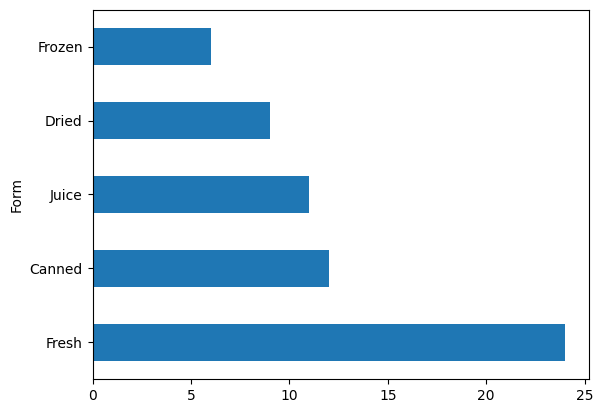

In [68]:
df_pandas = df.toPandas()

df_pandas['Form'].value_counts().plot(kind='barh')